In [2]:
import pandas as pd
import numpy as np
import statistics

In [3]:
human = pd.read_csv("/home/soham37/Downloads/xCOMET/xCOMET/human_evaluation_Anubhav - human_evaluation.csv")

In [4]:
human

,domain,source,reference,model_output,rating_out_of_5(Anubhav)
0,education,"There was a game and a system called Bee Star,...","बी स्टार नामक एक खेल और एक सिस्टम था, जिसे एक ...","एक खेल और एक सिस्टम बी स्टार था, जिसे एक शतरंज...",2
1,education,"There was a game and a system called Bee Star,...","बी स्टार नामक एक खेल और एक सिस्टम था, जिसे एक ...",एक खेल और एक सिस्टम था जिसे बी स्टार कहा जाता ...,3
2,education,"There was a game and a system called Bee Star,...","बी स्टार नामक एक खेल और एक सिस्टम था, जिसे एक ...",एक खेल और एक प्रणाली थी जिसे बी स्टार कहा जाता...,4
3,education,"There was a game and a system called Bee Star,...","बी स्टार नामक एक खेल और एक सिस्टम था, जिसे एक ...","पिछला एकाधिकार और एक प्रणाली नाक रेड, जिसका रा...",2
4,education,"There was a game and a system called Bee Star,...","बी स्टार नामक एक खेल और एक सिस्टम था, जिसे एक ...",एक खेल और एक सिस्टम था जिसे बी स्टार कहा जाता ...,3
...,...,...,...,...,...
283,review,very happy with the performance of asus zenfon...,आसुस जेनफोन मैक्स प्रो एम1 के प्रदर्शन से बहुत...,आसुस जेनफोन मैक्स प्रो एम1 के प्रदर्शन से बहुत...,4
284,review,very happy with the performance of asus zenfon...,आसुस जेनफोन मैक्स प्रो एम1 के प्रदर्शन से बहुत...,असूस ज़ेनफोन मैक्स प्रो एम 1 के प्रदर्शन से बह...,4
285,review,very happy with the performance of asus zenfon...,आसुस जेनफोन मैक्स प्रो एम1 के प्रदर्शन से बहुत...,आसुस जेनफोन मैक्स प्रो एम1 के प्रदर्शन से बहुत...,4
286,review,very happy with the performance of asus zenfon...,आसुस जेनफोन मैक्स प्रो एम1 के प्रदर्शन से बहुत...,मैं एशस ज़ेनफोन मैक्स प्रो एम1 के प्रदर्शन से ...,4


In [6]:
file = ["Aya23", "Claude_3_5", "CommandR_plus", "CycleL", "GPT_4", "IKUN", "IKUN_C", "IOL_Research", "Llama3_70B", "NVIDIA_NeMo", "ONLINE_A", "ONLINE_B", "ONLINE_G", "TranssionMT", "Unbabel_Tower70B", "ZMT"]

In [14]:
domains = {"edu": "education", "gen": "general", "jud": "judicial", "lit": "literature", "noi": "noisy", "rev": "review"}

In [16]:
domains["edu"]

'education'

In [21]:
domain_human_score = []

In [22]:
for domain in domains:
    name = f"{domains[domain]}_df"
    name = human[human["domain"] == f"{domains[domain]}"]
    domain_human_score.append(statistics.mean(name["rating_out_of_5(Anubhav)"]))

In [47]:
len(domains.values())

6

In [48]:
df_human_domain = pd.DataFrame({"domains": domains.values(), "human_score": domain_human_score})

In [49]:
df_human_domain

,domains,human_score
0,education,2.895833
1,general,3.479167
2,judicial,2.875000
3,literature,2.979167
4,noisy,2.354167
5,review,2.708333


In [ ]:
model_human_score = []

In [26]:
# Split the dataframe into 6 chunks of 16 rows each
chunks = np.array_split(human, 18)

/home/soham37/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [28]:
len(chunks)

18

In [29]:
# Sum the "rating_out_of_5(Anubhav)" values across all 18 chunks
result = [sum(values) / 18 for values in zip(*(chunk["rating_out_of_5(Anubhav)"] for chunk in chunks))]

In [34]:
model_human_score = [round(i, 2) for i in result]

In [50]:
df_human_model = pd.DataFrame({"models": file, "human_score": model_human_score})

In [51]:
df_human_model

,models,human_score
0,Aya23,3.00
1,Claude_3_5,3.61
2,CommandR_plus,3.44
3,CycleL,1.11
4,GPT_4,2.78
5,IKUN,2.28
6,IKUN_C,1.56
7,IOL_Research,3.06
8,Llama3_70B,3.00
9,NVIDIA_NeMo,2.22


In [8]:
education_df = human[human["domain"] == "education"]

In [52]:
import matplotlib.pyplot as plt

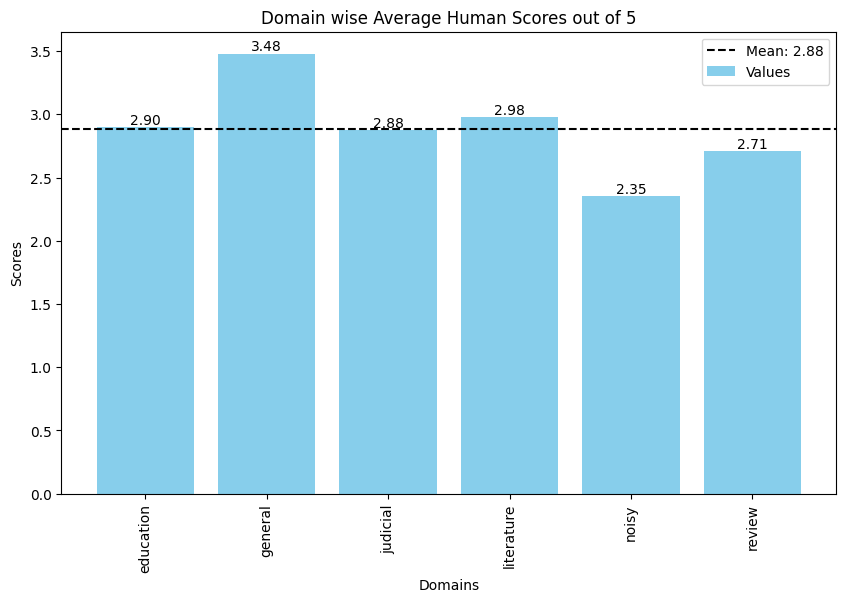

In [55]:
# Calculate the mean of the values
mean_value = df_human_domain['human_score'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
# plt.bar(final_model['file'], final_model['bleu_scores'], color='skyblue', label='Values')

bars = plt.bar(df_human_domain['domains'], df_human_domain['human_score'], color='skyblue', label='Values')

# Add a line for the mean value
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.xlabel('Domains')
plt.ylabel('Scores')
plt.title('Domain wise Average Human Scores out of 5')
plt.legend()

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)



# # Save the plot to a file
# plt.savefig('bar_graph_with_mean_line.png', bbox_inches='tight')
# Display the value on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')
    
# Show the plot
plt.show()

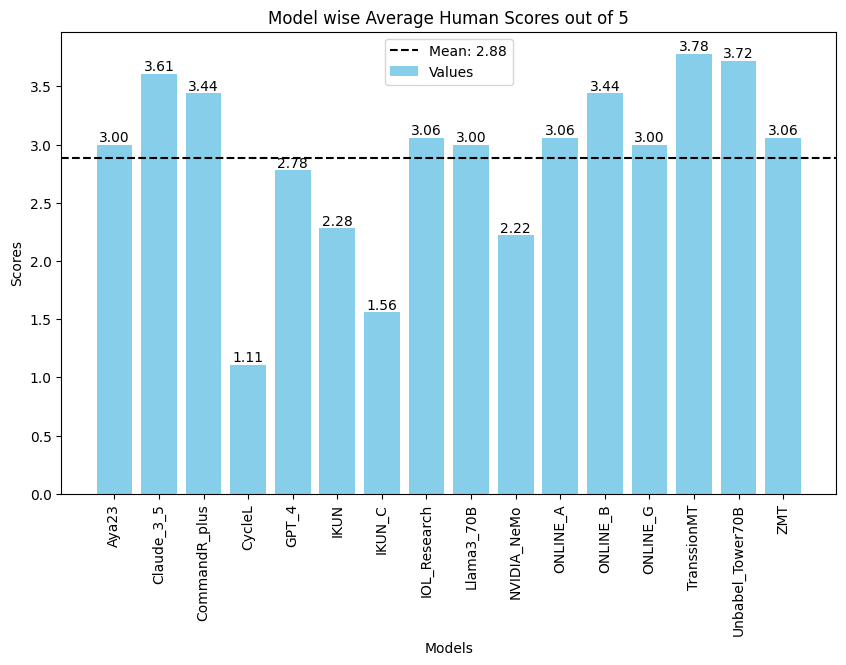

In [57]:
# Calculate the mean of the values
mean_value = df_human_model['human_score'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
# plt.bar(final_model['file'], final_model['bleu_scores'], color='skyblue', label='Values')

bars = plt.bar(df_human_model['models'], df_human_model['human_score'], color='skyblue', label='Values')

# Add a line for the mean value
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model wise Average Human Scores out of 5')
plt.legend()

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)



# # Save the plot to a file
# plt.savefig('bar_graph_with_mean_line.png', bbox_inches='tight')
# Display the value on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')
    
# Show the plot
plt.show()

In [39]:
score = []

In [40]:
human["rating_out_of_5(Anubhav)"][0]

np.int64(2)

In [96]:
i = 240

In [97]:
score = []
for a,b,c in zip(range(i, i+16), range(i+16, i+32), range(i+32, i+48)):
    score.append(round((human["rating_out_of_5(Anubhav)"][a] + human["rating_out_of_5(Anubhav)"][b] + human["rating_out_of_5(Anubhav)"][c])/3, 2))

In [98]:
review = score

In [99]:
review

[np.float64(3.0),
 np.float64(3.33),
 np.float64(3.33),
 np.float64(1.0),
 np.float64(2.33),
 np.float64(1.33),
 np.float64(1.33),
 np.float64(2.67),
 np.float64(2.67),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(3.33),
 np.float64(4.0),
 np.float64(3.0)]

In [95]:
noisy

[np.float64(3.0),
 np.float64(4.33),
 np.float64(3.67),
 np.float64(1.0),
 np.float64(3.67),
 np.float64(2.33),
 np.float64(2.0),
 np.float64(3.33),
 np.float64(3.67),
 np.float64(2.33),
 np.float64(3.0),
 np.float64(2.67),
 np.float64(3.33),
 np.float64(3.67),
 np.float64(3.0),
 np.float64(2.67)]

In [91]:
literature

[np.float64(2.67),
 np.float64(3.33),
 np.float64(3.33),
 np.float64(1.0),
 np.float64(2.67),
 np.float64(2.0),
 np.float64(1.33),
 np.float64(3.0),
 np.float64(2.67),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(3.33),
 np.float64(1.67),
 np.float64(3.33),
 np.float64(2.67),
 np.float64(1.67)]

In [87]:
judicial

[np.float64(4.0),
 np.float64(3.67),
 np.float64(3.0),
 np.float64(1.0),
 np.float64(2.67),
 np.float64(2.33),
 np.float64(1.0),
 np.float64(3.33),
 np.float64(3.0),
 np.float64(1.33),
 np.float64(3.33),
 np.float64(3.67),
 np.float64(2.67),
 np.float64(4.0),
 np.float64(3.67),
 np.float64(3.33)]

In [83]:
general

[np.float64(3.33),
 np.float64(3.67),
 np.float64(3.67),
 np.float64(1.33),
 np.float64(2.67),
 np.float64(3.0),
 np.float64(2.33),
 np.float64(4.0),
 np.float64(3.0),
 np.float64(3.67),
 np.float64(4.0),
 np.float64(4.0),
 np.float64(3.67),
 np.float64(4.67),
 np.float64(4.67),
 np.float64(4.0)]

In [79]:
education

[np.float64(2.0),
 np.float64(3.33),
 np.float64(3.67),
 np.float64(1.33),
 np.float64(2.67),
 np.float64(2.67),
 np.float64(1.33),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(2.67),
 np.float64(3.67),
 np.float64(4.33),
 np.float64(3.67)]

In [60]:
general

[]

In [21]:
human["rating_out_of_5(Anubhav)"][1]

np.int64(3)